# Projeto - Machine Learning I

### Prof. Tiago Marto
### Membros do grupo
- Eugênio Pacheco
- Isabella Beserra
- José Venâncio
- Julia Muto
- Will Menezes

## Enunciado

Neste módulo, vamos fazer um estudo de caso para práticar a análise dos resultados de um projeto de machine learning, você deverá se reunir em um grupo com de 4 a 5 pessoas e seguir o passo a passo abaixo.

- Escolher um Dataset, valide com o professor se o dataset escolhido é valido :heavy_check_mark:

- Definir uma aplicação de Machine Learning para aplicar ao Dataset: escolhemos como variável dependente (target) a qualidade do sono por meio de classificação

   a. Esta aplicação pode ser uma regressão ou uma classificação para predizer um target a sua escolha.

- Fazer a análise com pelo menos 2 estimadores, comparando os resultados

- Fazer a otimização dos hiperparâmetros, utilizando a metodologia da preferência do grupo

- Fazer a discussão de se o modelo está bom o suficiente para ser aplicado em produção, resolvendo o problema formulado no início

A avaliação sera feita em uma apresentação, com o grupo apresentando e discutindo a metodologia de tratamento dos dados e os resultados obtidos. Pede-se que cada grupo preencha na planilha o dataset escolhido.

## Dataset


Disponível em: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

### Metadados

- Person ID: Identificador para cada indivíduo.
- Gender: Gênero de cada pessoa (Feminino/Masculino)
- Age: Idade da pessoa em anos.
- Occupation: Ocupação ou profissão da pessoa.
- Sleep Duration (hours): Número de horas que a pessoa dorme por dia.
- **Quality of Sleep** (scale: 1-10): Nota subjetiva de qualidade do sono entre 1 e 10.
- Physical Activity Level (minutes/day): Número de minutos que a pessoa realiza atividades físicas diariamente.
- Stress Level (scale: 1-10): Nota subjetiva de nível de stress vivida pela pessoa entre 1 e 10.
- BMI Category: Categoria do IMC de cada pessoa(e.g., ||The BMI category of the person (e.g., Normal, Sobrepeso, Obesidade).
- Blood Pressure (systolic/diastolic): Medição da pressão sanguínea de cada pessoa, indicada por pressão sistólica sobre pressão diastólica.
- Heart Rate (bpm): Batimento cardíaco da pessoa enquanto descansada.
- Daily Steps: Número de passos dados pela pessoa por dia.
- **Sleep Disorder**: Presença ou falta de uma desordem de sono na pessoa (Nenhuma, Insônia, Apnéia do sono).

## Importações

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Investigação inicial do dataset

In [72]:
df = pd.read_csv("sleep.csv")

In [73]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [74]:
# A coluna ID é uma coluna desnecessária à análise
# Iremos dropá-la logo, para verificação de duplicados posterior.
# Há muitas colunas categóricas/object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [75]:
df.drop(columns=['Person ID'], inplace=True)

In [76]:
# Verificando valores das colunas categóricas/object:
print(df['Gender'].value_counts())
print("-"*50)
print(df['Occupation'].value_counts())
print("-"*50)
print(df['BMI Category'].value_counts())
print("-"*50)
print(df['Blood Pressure'].value_counts())
print("-"*50)
print(df['Sleep Disorder'].value_counts())

Male      189
Female    185
Name: Gender, dtype: int64
--------------------------------------------------
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64
--------------------------------------------------
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64
--------------------------------------------------
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: Blood Pressure, 

In [77]:
# Verificando a quantidade de registros
df.shape

(374, 12)

In [78]:
df.describe(include='all')

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,374
unique,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,3
top,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,None
freq,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,219
mean,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


In [79]:
# Não há registros nulos
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [80]:
# Ao dropar a coluna ID verifica-se a existência de muitos registros duplicados
df.duplicated().sum()

242

## Ajuste inicial de dados

In [81]:
# Dropando registros duplicados para evitar data leakage.
# Embora estejam sendo dropados, há certa discussão sobre
# o quão isso impactará no modelo, dado que se os dados são repetidos
# para pessoas diferentes, onde todas as variáveis independentes são iguais
# e resultaram no mesmo valor para a variável dependente, reforça que
# se o modelo aprendesse com esses dados, teriam peso maior para assertividade
# das notas. Desta forma, iremos trazê-los de volta para os dados de treino.
df_duplicados = df[df.duplicated()]
df2 = df.copy(deep=True)
df2.drop_duplicates(inplace=True)
df2.reset_index(drop=True,inplace=True)

### Transformando variáveis categóricas

In [82]:
df2['Gender'] = df2['Gender'].map({'Male':0, 'Female': 1})

In [83]:
df2['BMI Category'] = df2['BMI Category'].map({'Normal Weight': 0, 'Normal':0, 'Obese': 2, 'Overweight': 1})

In [84]:
# calculo da pressão arterial media (MAP):
# MAP = (sistolica + 2x diastolica)/3
#normal = abaixo de 90
#elevado = entre 90 e 92
#hipertensão 1 = entre 92 e 96
#hipertensão 2 = acima de 96

#Separando a coluna "Blood Pressure" (Pressão Sanguínea) em pressões sistólica e diastólica
systolic = df2['Blood Pressure'].apply(lambda x: x.split('/')[0]).apply(lambda x: int(x))
diastolic = df2['Blood Pressure'].apply(lambda x: x.split('/')[1]).apply(lambda x: int(x))

map = []
for measure in range(len(systolic)):
  map.append(round((systolic[measure] + (2*diastolic[measure]))/3,1))

df2['MAP'] = map

In [85]:
df2

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,MAP
0,0,27,Software Engineer,6.1,6,42,6,1,126/83,77,4200,None,97.3
1,0,28,Doctor,6.2,6,60,8,0,125/80,75,10000,None,95.0
2,0,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea,106.7
3,0,28,Software Engineer,5.9,4,30,8,2,140/90,85,3000,Insomnia,106.7
4,0,29,Teacher,6.3,6,40,7,2,140/90,82,3500,Insomnia,106.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1,59,Nurse,8.0,9,75,3,1,140/95,68,7000,None,110.0
128,1,59,Nurse,8.1,9,75,3,1,140/95,68,7000,None,110.0
129,1,59,Nurse,8.2,9,75,3,1,140/95,68,7000,Sleep Apnea,110.0
130,1,59,Nurse,8.0,9,75,3,1,140/95,68,7000,Sleep Apnea,110.0


## Visualização dos dados

Vamos investigar como se comportam as distribuições dos parâmetros do dataset

### Duração do Sono

<AxesSubplot: xlabel='Sleep Duration', ylabel='Count'>

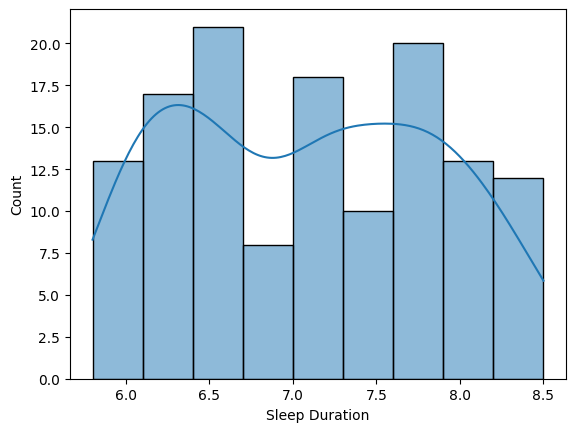

In [86]:
sns.histplot(df2, x="Sleep Duration", kde=True)

### Qualidade do Sono

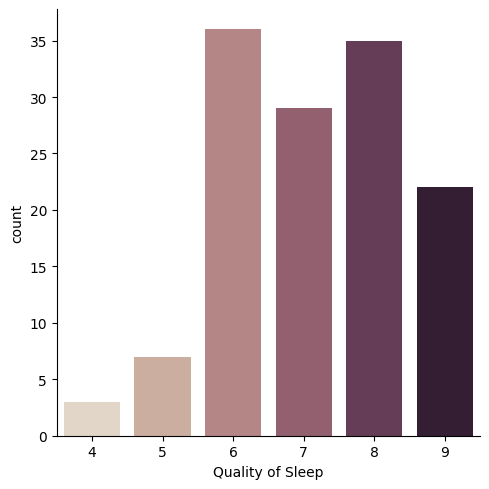

In [87]:
sns.catplot(df2, x="Quality of Sleep", kind="count", palette="ch:.25")

<AxesSubplot: xlabel='Quality of Sleep'>

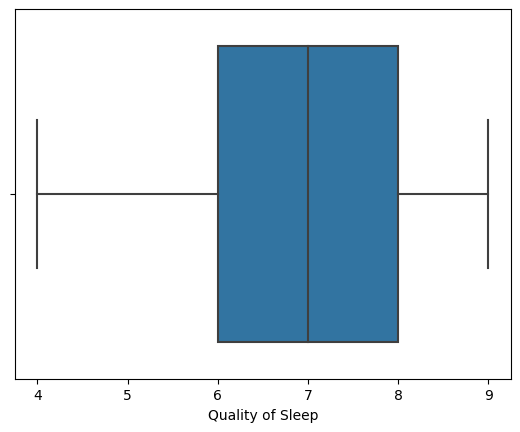

In [88]:
sns.boxplot(df2, x="Quality of Sleep")

### Nível de atividade física

<AxesSubplot: xlabel='Physical Activity Level', ylabel='Count'>

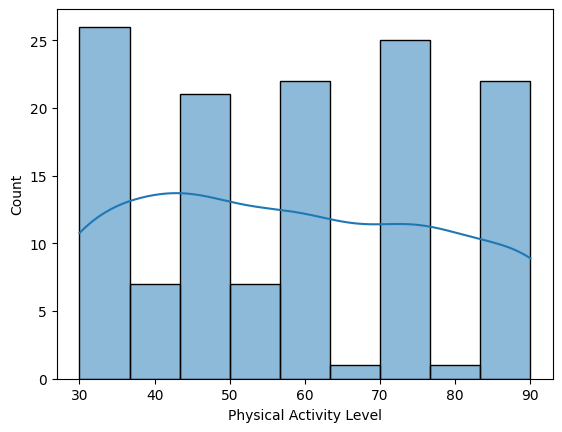

In [89]:
sns.histplot(df2, x="Physical Activity Level", kde=True)

### Nível de Stress

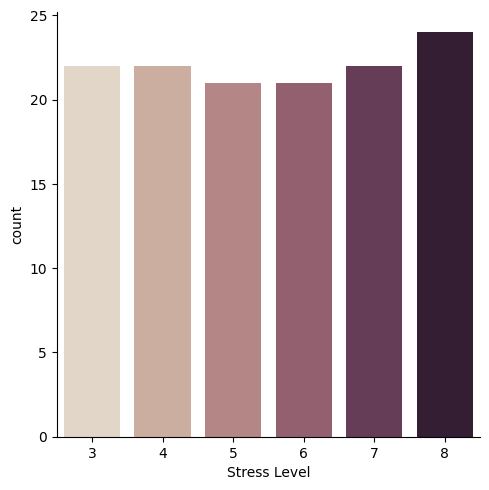

In [90]:
sns.catplot(df2, x="Stress Level", kind="count", palette="ch:.25")

### Categoria do IMC

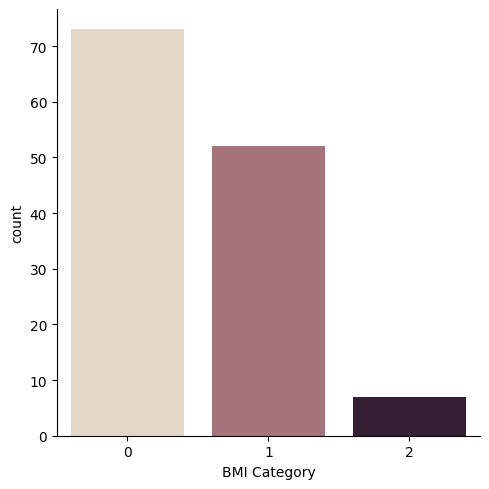

In [91]:
sns.catplot(df2, x="BMI Category", kind="count", palette="ch:.25")

### Batimento Cardíaco

<AxesSubplot: xlabel='Heart Rate', ylabel='Count'>

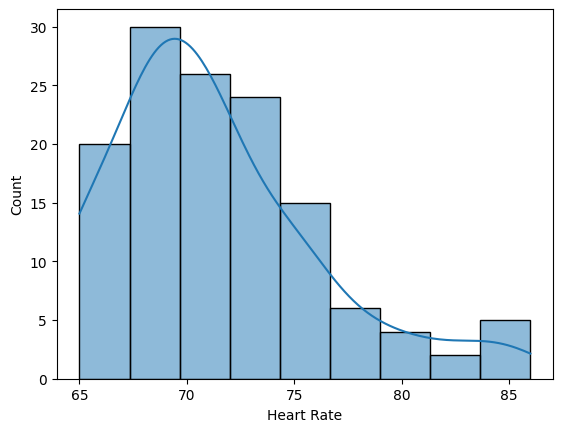

In [92]:
sns.histplot(df2, x="Heart Rate", kde=True)

### Passos Diários

<AxesSubplot: xlabel='Daily Steps', ylabel='Count'>

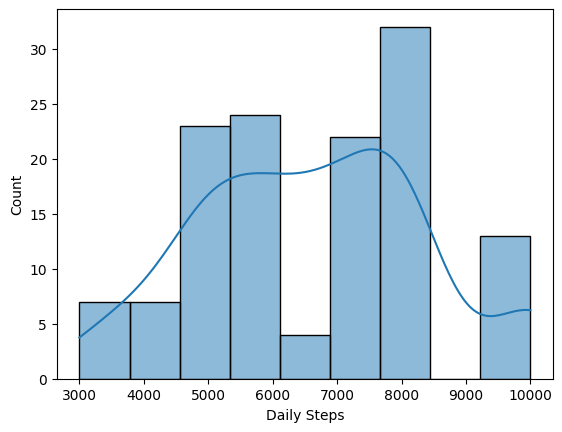

In [93]:
sns.histplot(df2, x="Daily Steps", kde=True)

### Desordem de Sono

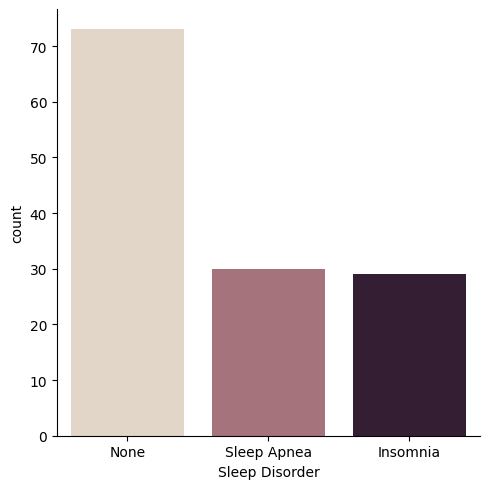

In [94]:
sns.catplot(df2, x="Sleep Disorder", kind="count", palette="ch:.25")

### Ocupação

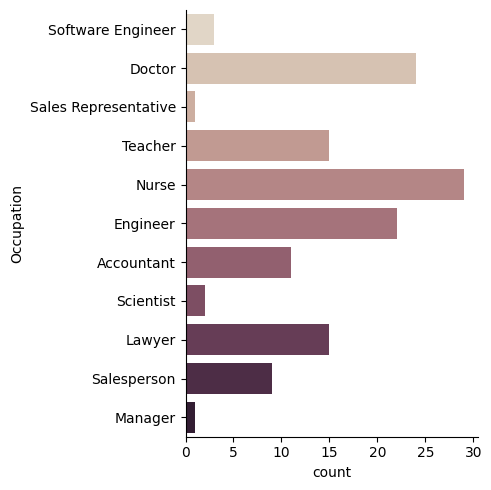

In [95]:
sns.catplot(df2, y="Occupation", kind="count", palette="ch:.25")

### Distribuições relacionais par a par

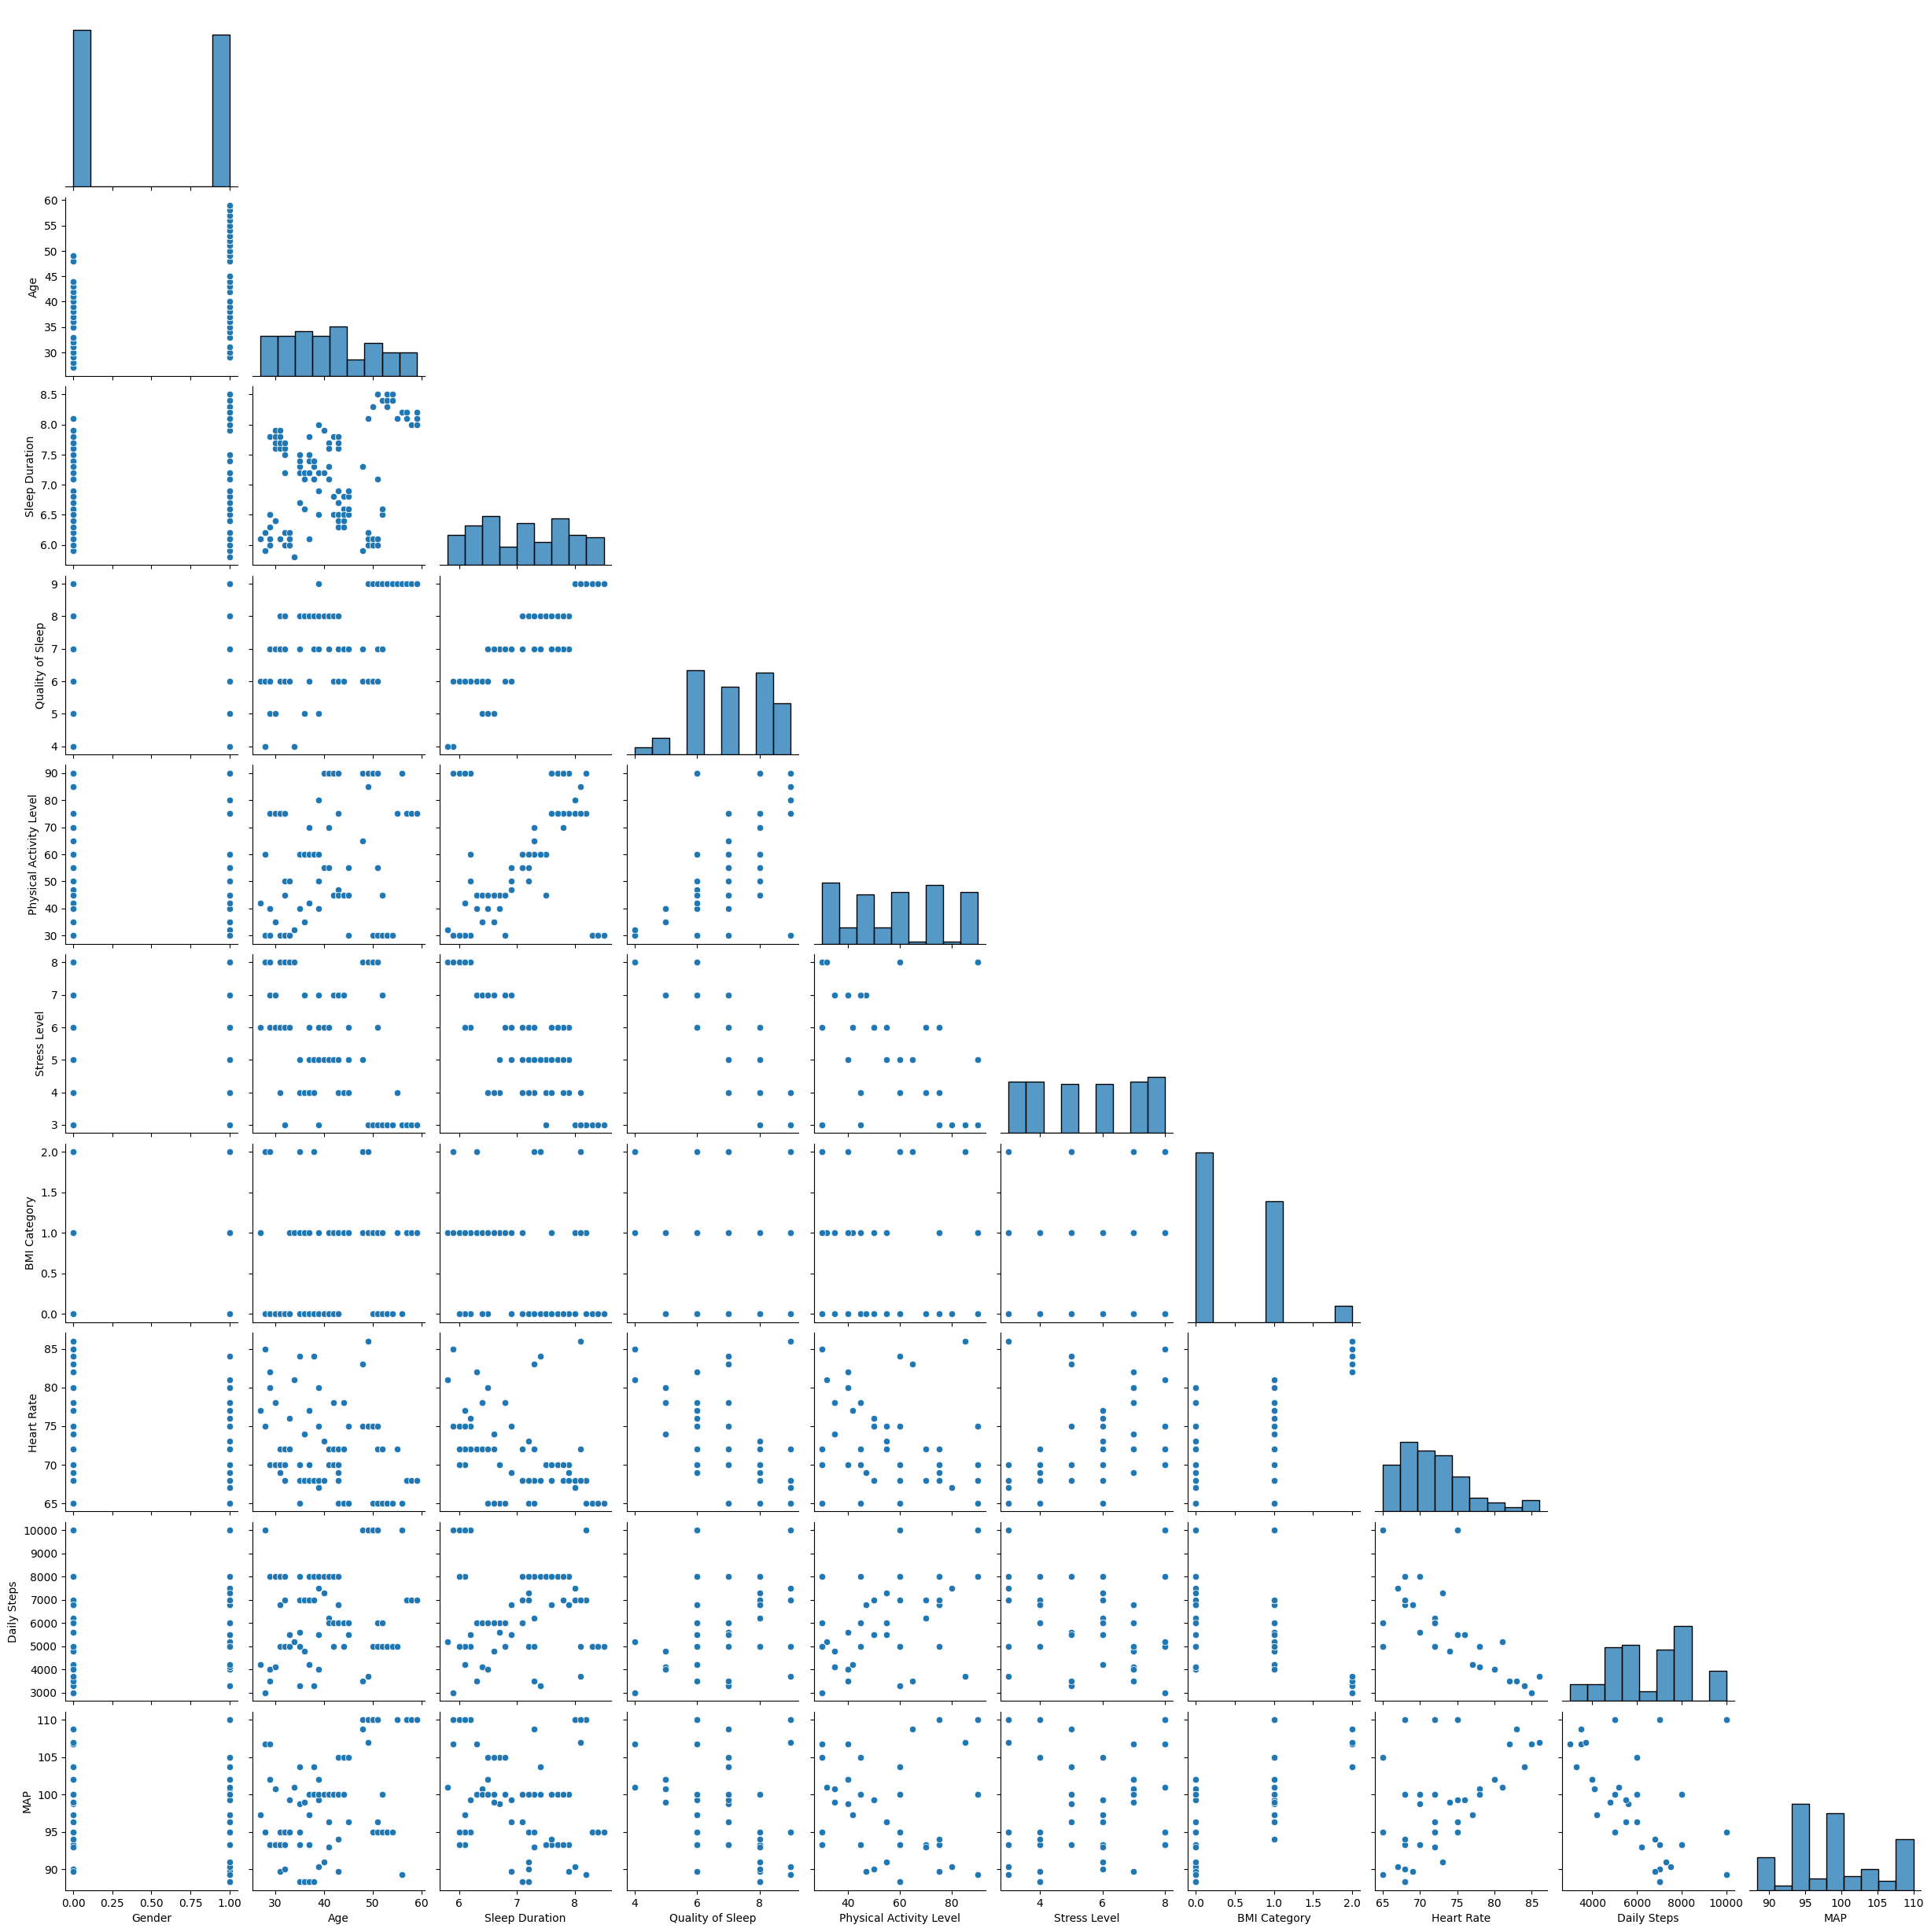

In [96]:
sns.pairplot(df2, corner=True)

## Transformações

### Variável dependente (Target)

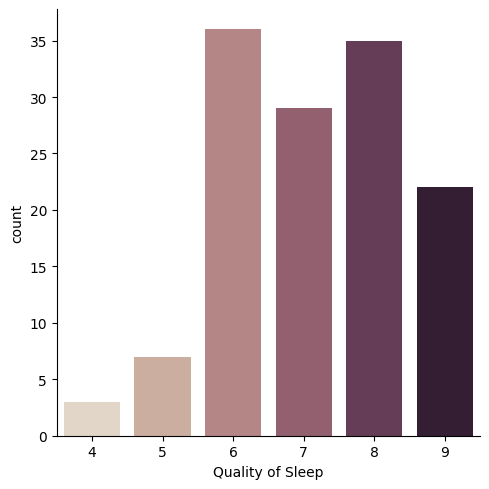

In [97]:
sns.catplot(df2, x="Quality of Sleep", kind="count", palette="ch:.25")

In [98]:
# Para balancear os dados, optamos por considerar que bom sono
# tem nota de 8 pra cima e sono não tão bom tem nota de 7 para baixo.
df2['Quality of Sleep_bin'] = df2['Quality of Sleep'].apply(lambda x : 1 if x > 7 else 0)

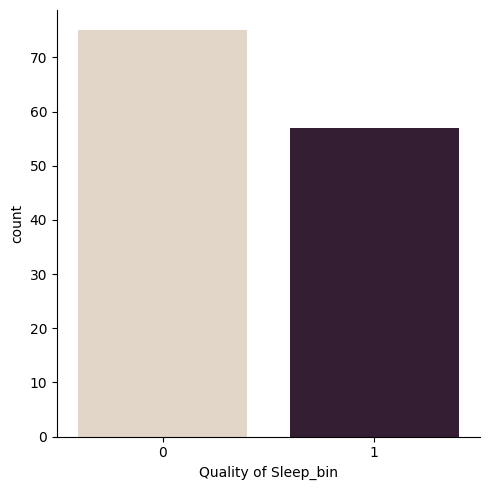

In [99]:
sns.catplot(df2, x="Quality of Sleep_bin", kind="count", palette="ch:.25")

Em vez de nota, separamos em bom (1) e ruim (0). A separação foi baseada na busca por um equilíbrio maior entre as categorias

### Variaveis Independentes (parâmetros/features)

#### Categoria de IMC

In [100]:
df2 = pd.get_dummies(df2, columns=["BMI Category"], prefix="BMI Category", drop_first=True)

#### Desordem de Sono

In [101]:
df2 = pd.get_dummies(df2, columns=["Sleep Disorder"], prefix="Sleep Disorder")

In [102]:
df2.drop(columns="Sleep Disorder_None", axis=1, inplace=True)

#### Ocupação

In [103]:
df2 = pd.get_dummies(df2, columns=["Occupation"], prefix="Occupation", drop_first=True)

## Análise de correlações

<AxesSubplot: >

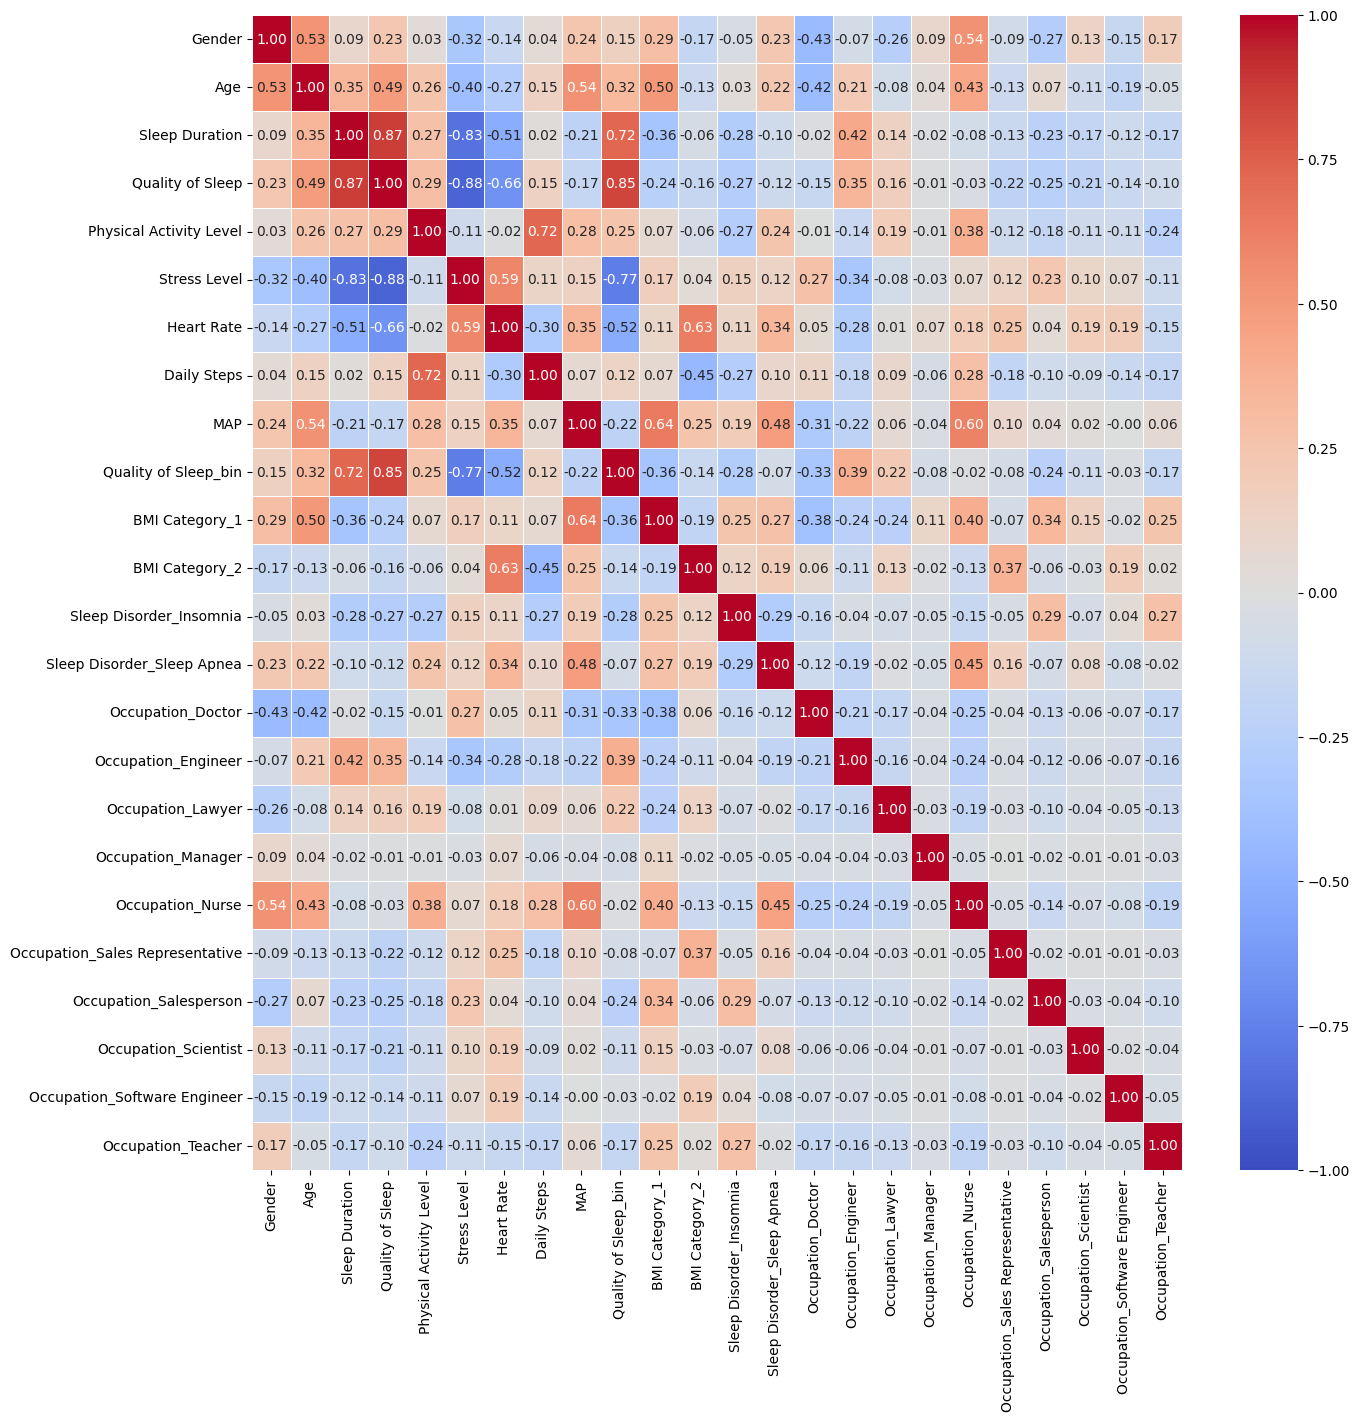

In [104]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), vmax=1, vmin=-1, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f')

Baseados no heatmap, faz sentido droparmos:
- Daily Steps (multicolinearidade com "Physical Activity Level", que explica melhor)
- Sleep Disorder_Apnea (multicolinearidade com "Mean Arterial Pressure", que explica melhor)

(https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)

In [105]:
df2.drop(columns=["Daily Steps", "Sleep Disorder_Sleep Apnea"], axis=1, inplace=True)

<AxesSubplot: >

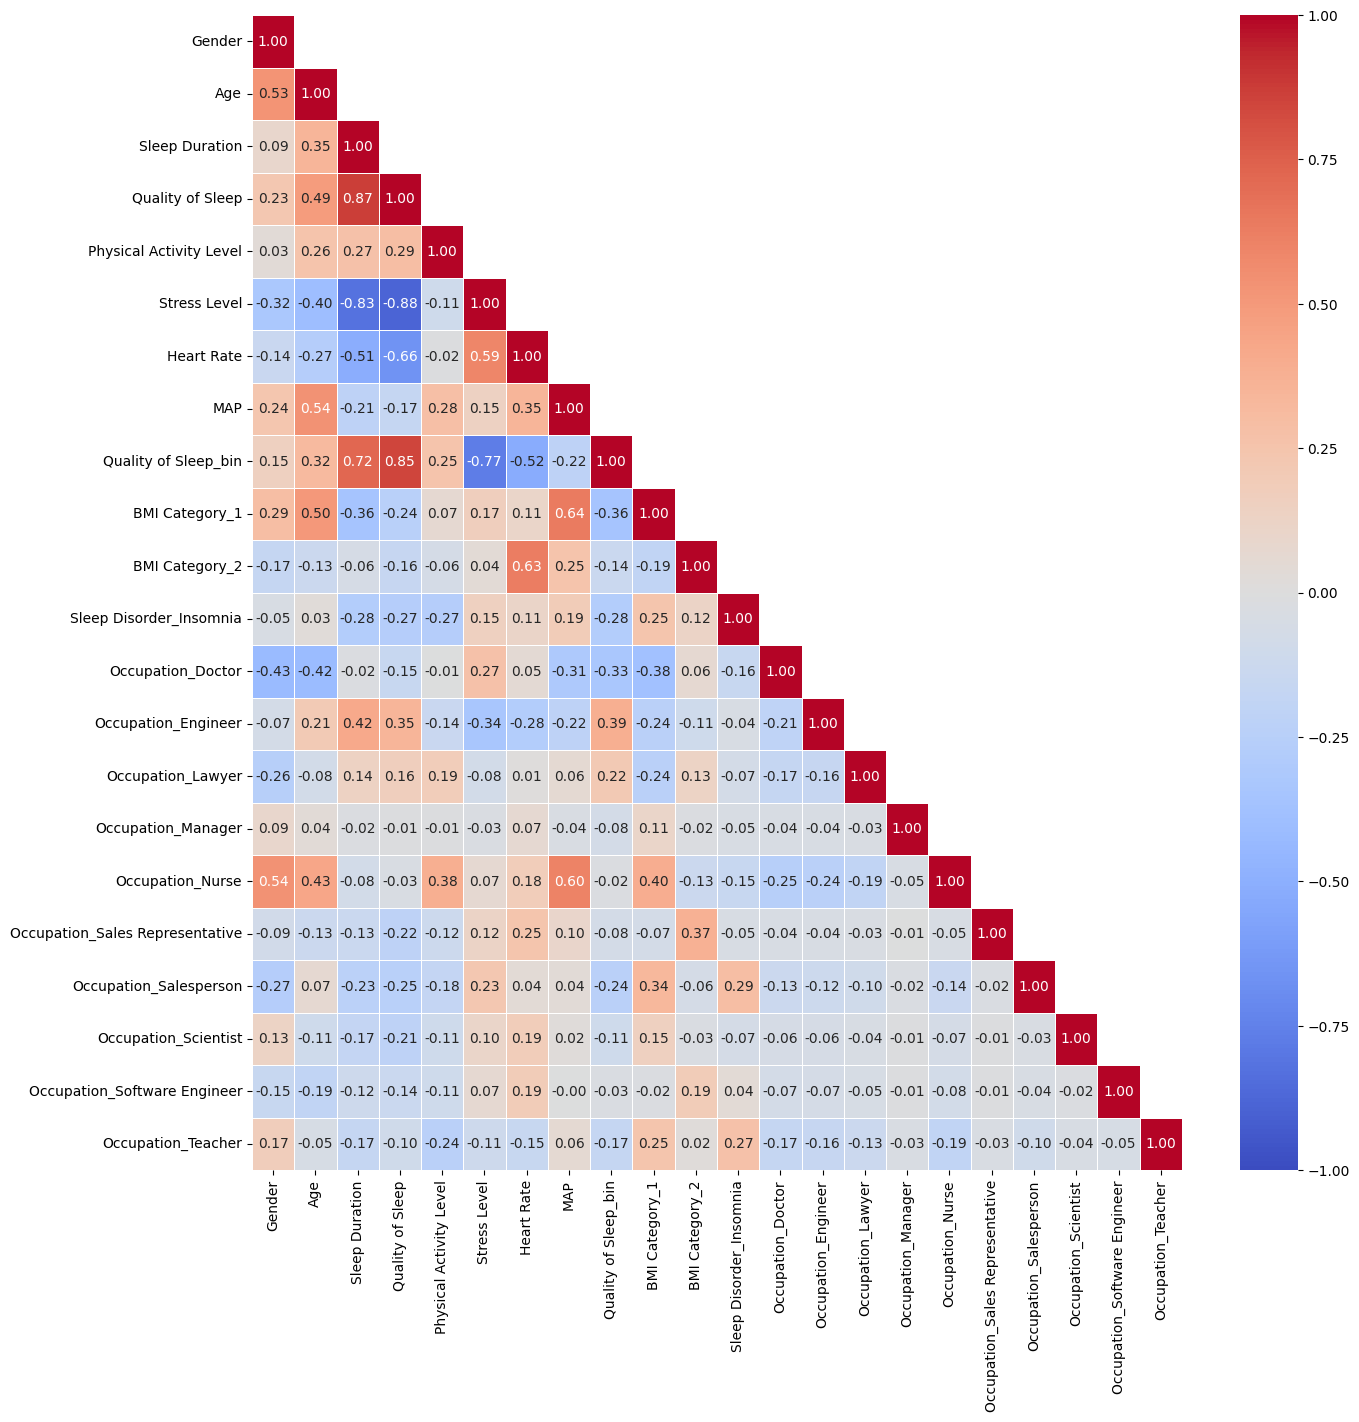

In [106]:
mask = np.triu(df2.corr())
np.fill_diagonal(mask, False)
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), vmax=1, vmin=-1, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f', mask=mask)

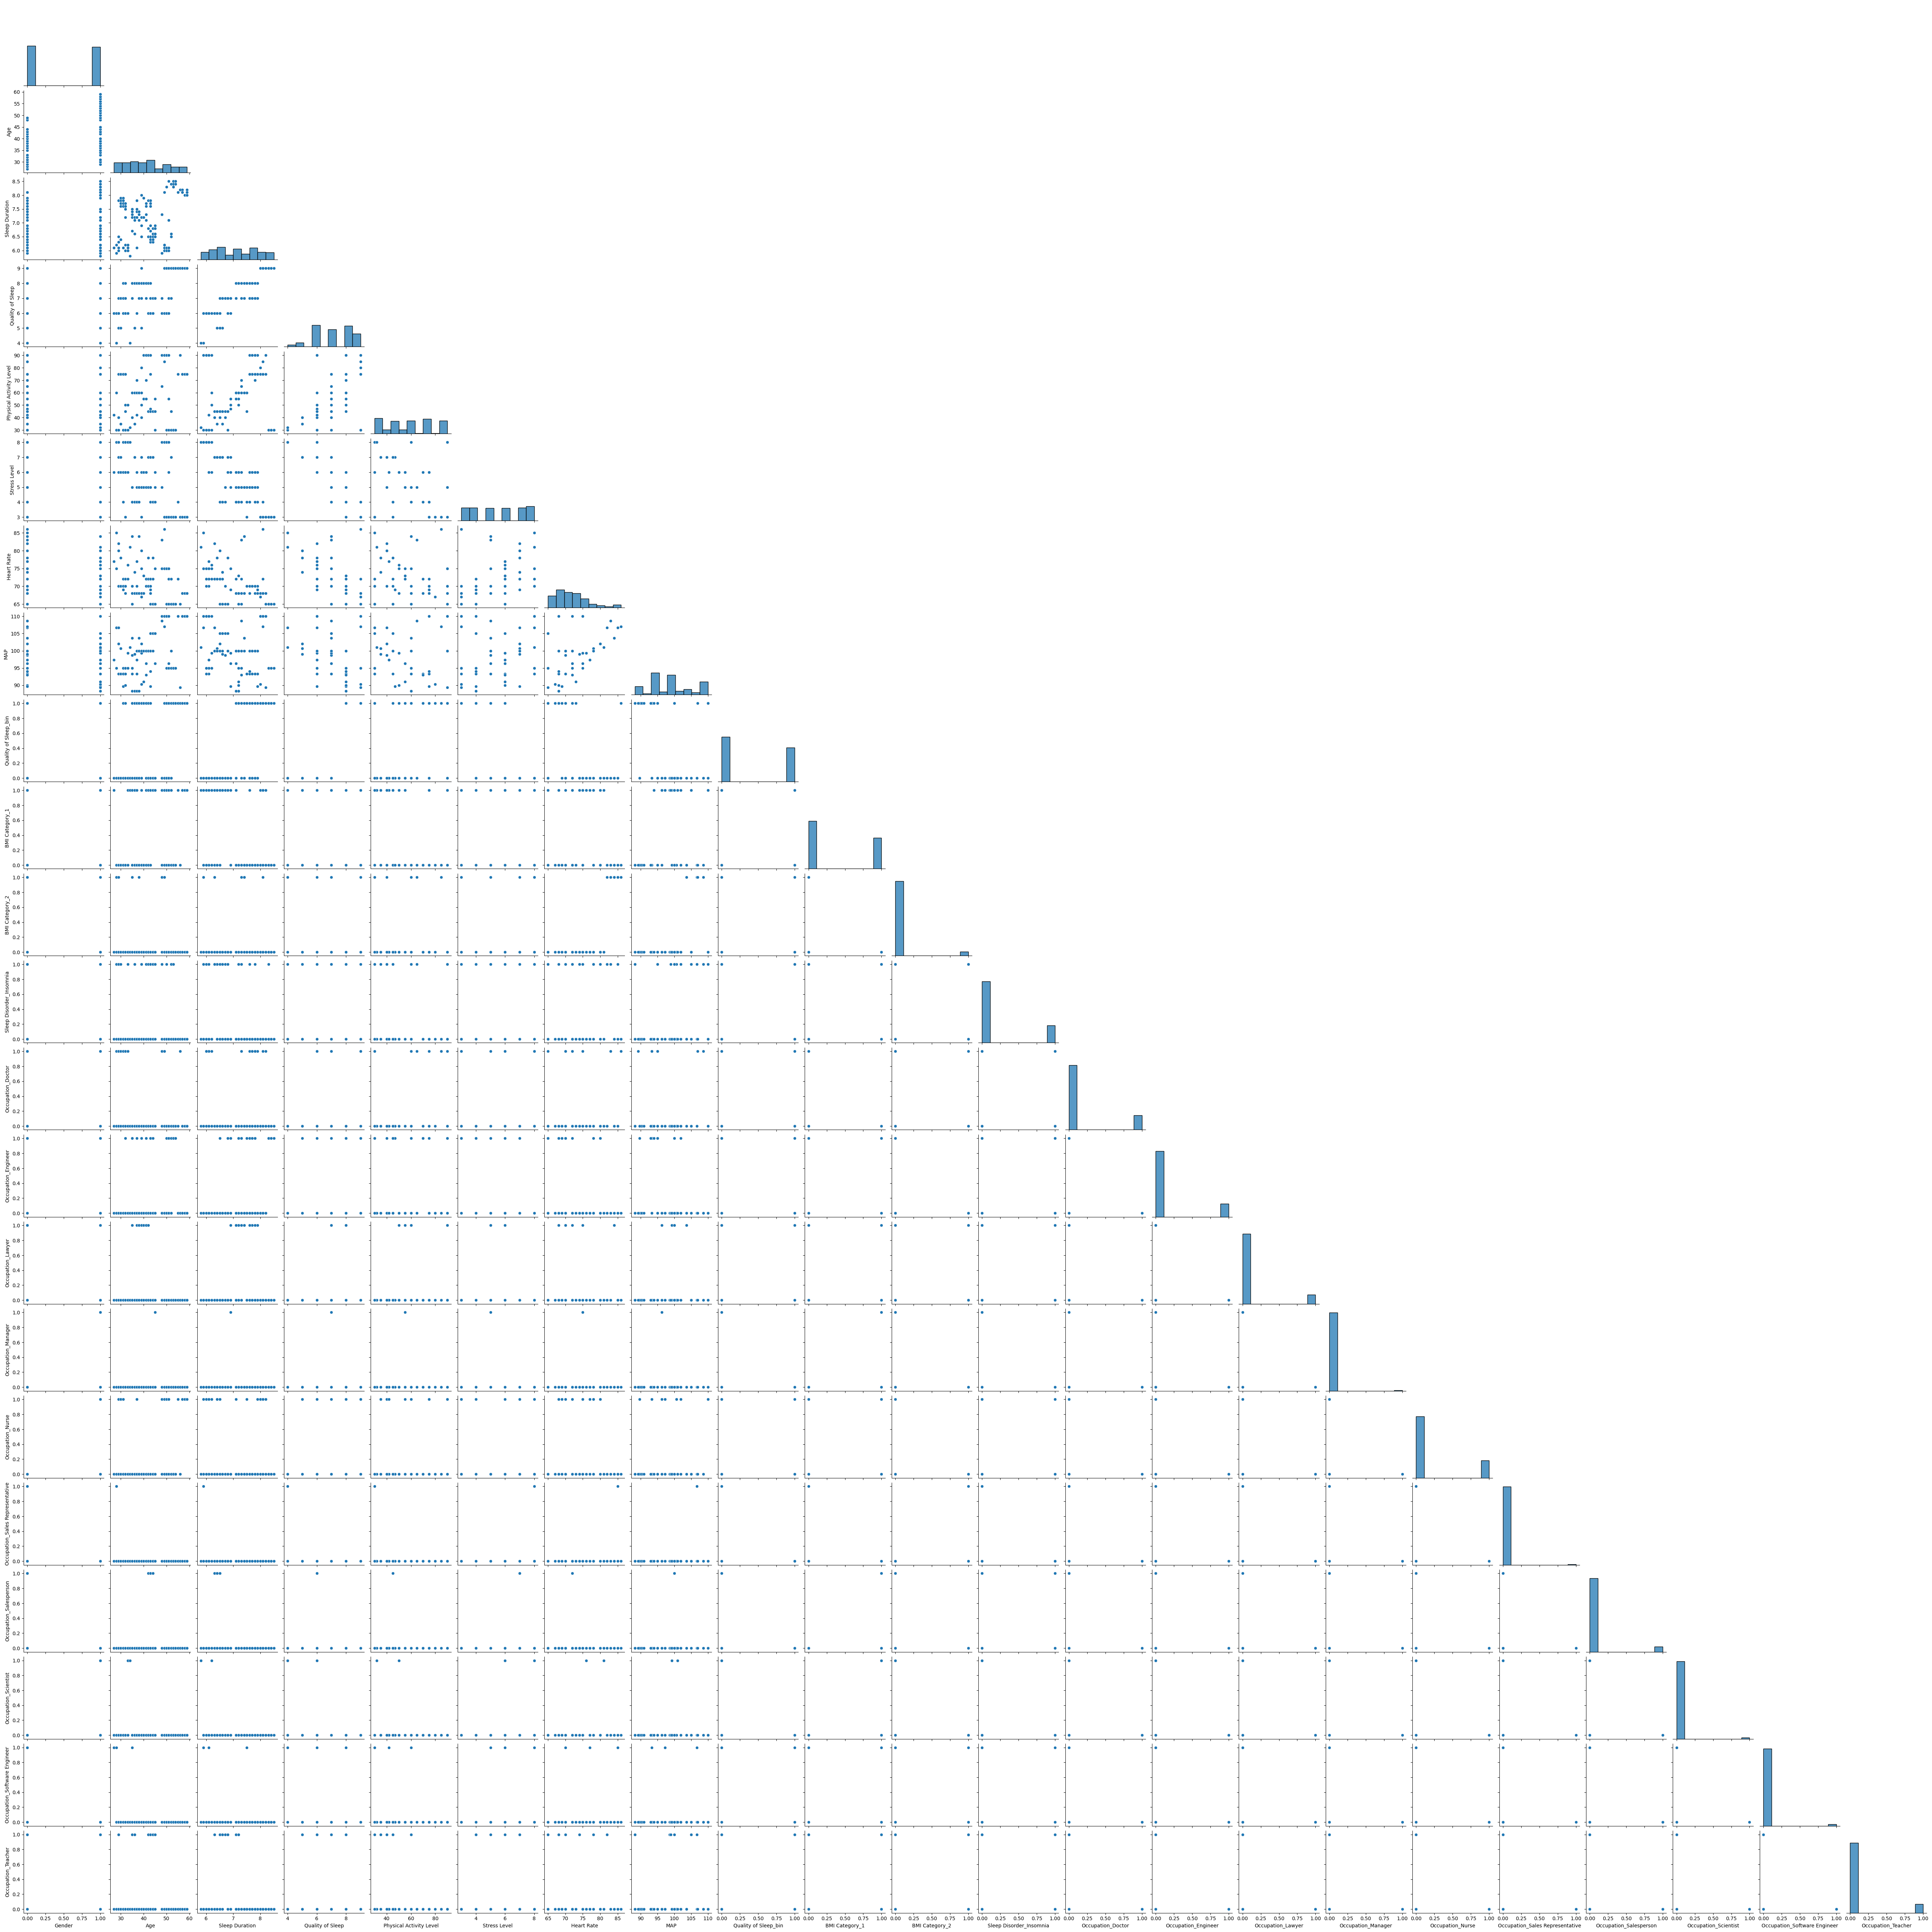

In [107]:
sns.pairplot(df2, corner=True)

In [108]:
df2.head(20)

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,MAP,Quality of Sleep_bin,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,0,27,6.1,6,42,6,126/83,77,97.3,0,...,0,0,0,0,0,0,0,0,1,0
1,0,28,6.2,6,60,8,125/80,75,95.0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,28,5.9,4,30,8,140/90,85,106.7,0,...,0,0,0,0,0,1,0,0,0,0
3,0,28,5.9,4,30,8,140/90,85,106.7,0,...,0,0,0,0,0,0,0,0,1,0
4,0,29,6.3,6,40,7,140/90,82,106.7,0,...,0,0,0,0,0,0,0,0,0,1
5,0,29,7.8,7,75,6,120/80,70,93.3,0,...,1,0,0,0,0,0,0,0,0,0
6,0,29,6.1,6,30,8,120/80,70,93.3,0,...,1,0,0,0,0,0,0,0,0,0
7,0,29,6.0,6,30,8,120/80,70,93.3,0,...,1,0,0,0,0,0,0,0,0,0
8,1,29,6.5,5,40,7,132/87,80,102.0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,29,6.0,6,30,8,120/80,70,93.3,0,...,1,0,0,0,0,0,0,0,0,0


## Modelagem

### Preparação e separação dos dados, prévia para todos os estimadores

In [109]:
# Separando em Target e Features
y = df2['Quality of Sleep_bin']
X = df2.drop(columns=["Quality of Sleep_bin", "Quality of Sleep", "Blood Pressure"])

In [110]:
# Separando dados para grupos de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

### Regressão Logística (Baseline)

In [111]:
# Criando pipeline
etapas = [("std_scaler", StandardScaler()),
          ("log_reg", LogisticRegression())]

pipe = Pipeline(etapas)

In [112]:
# Criando KFold Estratificado para a cross-validation:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [113]:
# Otimizando hiperparâmetros:
param_grid = {
    "log_reg__penalty" : ["", "l1", "l2", "elasticnet"],
    "log_reg__solver"  : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

# Utilizando GridSearch para otimizar os hiperparâmetros
grid = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

# Executando o GridSearch:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_reg__penalty': ['', 'l1', 'l2', 'elasticnet'],
                         'log_reg__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                             'newton-cholesky', 'sag',
                                             'saga']},
             scoring=make_scorer(accuracy_score))

In [114]:
grid.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(penalty='l1', solver='saga'))])

In [115]:
# Aparentemente os parâmetros padrões foram os melhores
grid.best_params_

{'log_reg__penalty': 'l1', 'log_reg__solver': 'saga'}

In [116]:
# Melhor métrica com os melhores parâmetros
grid.best_score_

0.968888888888889

#### Avaliando a generalização:


Métricas de avaliação de teste:
[[22  1]
 [ 1 16]]


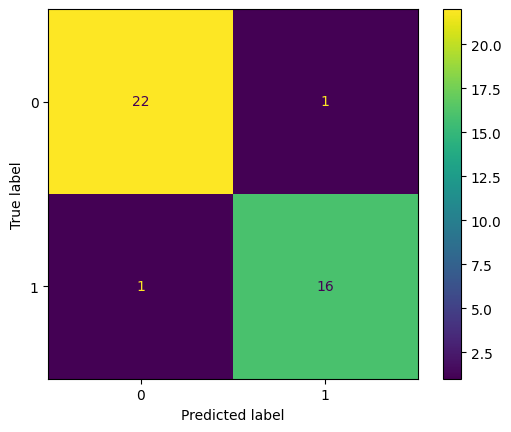

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.94      0.94      0.94        17

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40


# ====================


Métricas de avaliação de treino:
[[52  0]
 [ 0 40]]


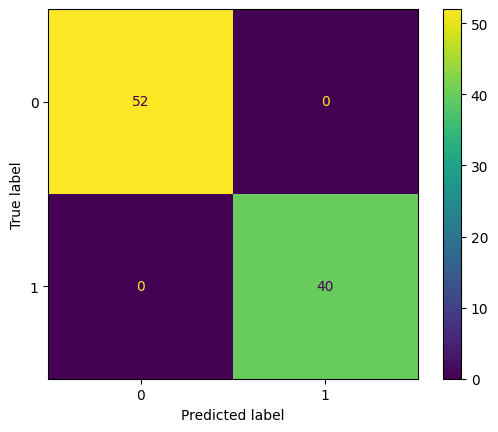

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        40

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



In [117]:
print("\nMétricas de avaliação de teste:")
y_pred_test = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

print("\nMétricas de avaliação de treino:")

y_pred_train = grid.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

### K Nearest Neighbors

In [118]:
# Criando pipeline
etapas = [("std_scaler", StandardScaler()),
          ("knn", KNeighborsClassifier())]

pipe = Pipeline(etapas)

In [119]:
# Criando KFold Estratificado para a cross-validation:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [120]:
# Otimizando hiperparâmetros:
param_grid = {
    "knn__weights" : ["distance", "uniform"],
    "knn__metric" : ["manhattan", "euclidean", "minkowski"],
    "knn__n_neighbors" : range(3, 20)
}

# Utilizando GridSearch para otimizar os hiperparâmetros
grid = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

# Executando o GridSearch:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'minkowski'],
                         'knn__n_neighbors': range(3, 20),
                         'knn__weights': ['distance', 'uniform']},
             scoring=make_scorer(accuracy_score))

In [121]:
grid.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=15,
                                      weights='distance'))])

In [122]:
grid.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 15,
 'knn__weights': 'distance'}

In [123]:
# Melhor métrica com os melhores parâmetros
grid.best_score_

0.9677777777777777

#### Avaliando a generalização:


Métricas de avaliação de teste:
[[22  1]
 [ 0 17]]


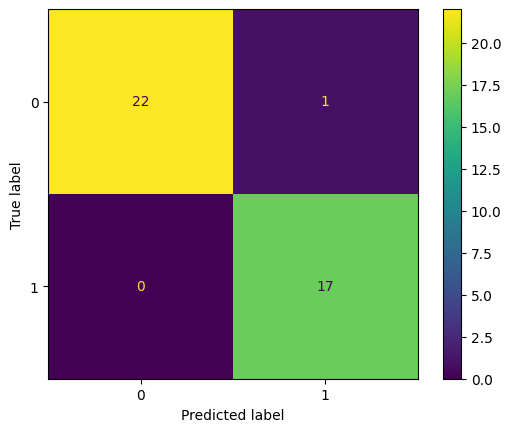

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        17

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40


# ====================


Métricas de avaliação de treino:
[[52  0]
 [ 0 40]]


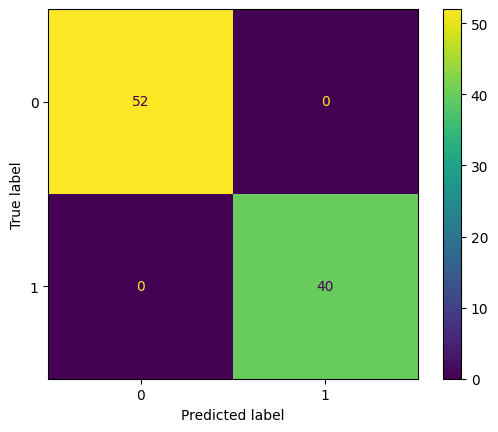

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        40

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



In [124]:
print("\nMétricas de avaliação de teste:")
y_pred_test = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

print("\nMétricas de avaliação de treino:")

y_pred_train = grid.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

### Árvore de decisão

In [125]:
# Criando pipeline
etapas = [("std_scaler", StandardScaler()),
          ("dt", DecisionTreeClassifier(random_state=42))]

pipe = Pipeline(etapas)

In [126]:
# Criando KFold Estratificado para a cross-validation:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [127]:
# Otimizando hiperparâmetros:
param_grid = {
    "dt__criterion" : ["gini", "entropy"],
    "dt__splitter" : ["best", "random"],
    "dt__max_depth" : range(2, 11)
}

# Utilizando GridSearch para otimizar os hiperparâmetros
grid = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

# Executando o GridSearch:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': range(2, 11),
                         'dt__splitter': ['best', 'random']},
             scoring=make_scorer(accuracy_score))

In [128]:
grid.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 4, 'dt__splitter': 'random'}

In [129]:
# Melhor métrica com os melhores parâmetros
grid.best_score_

0.9688888888888888

#### Avaliando a generalização:


Métricas de avaliação de teste:
[[22  1]
 [ 0 17]]


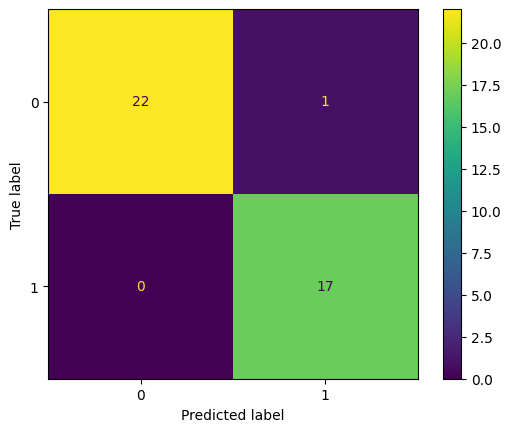

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        17

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40


# ====================


Métricas de avaliação de treino:
[[51  1]
 [ 1 39]]


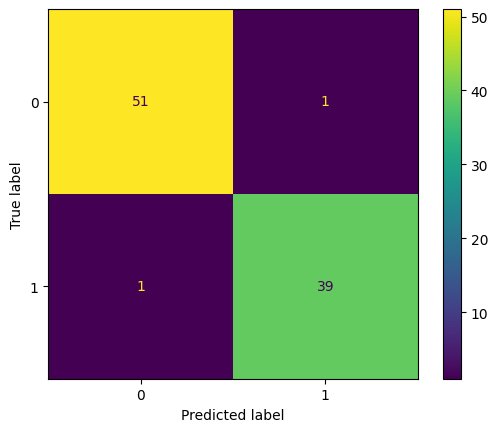

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.97      0.97      0.97        40

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



In [130]:
print("\nMétricas de avaliação de teste:")
y_pred_test = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

print("\nMétricas de avaliação de treino:")

y_pred_train = grid.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

### Random Forest Classifier

In [131]:
# Criando pipeline
etapas = [("std_scaler", StandardScaler()),
          ("rf", RandomForestClassifier(random_state=42))]

pipe = Pipeline(etapas)

In [132]:
# Criando KFold Estratificado para a cross-validation:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

In [133]:
# Otimizando hiperparâmetros:
param_grid = {
    "rf__n_estimators" : range(100, 600, 100),
    "rf__max_depth" : range(3, 6),
    "rf__max_features" : ['sqrt', 'log2'],
    "rf__criterion" : ['entropy', 'gini']
}

# Utilizando GridSearch para otimizar os hiperparâmetros
grid = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

# Executando o GridSearch:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['entropy', 'gini'],
                         'rf__max_depth': range(3, 6),
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__n_estimators': range(100, 600, 100)},
             scoring=make_scorer(accuracy_score))

In [134]:
grid.best_params_

{'rf__criterion': 'entropy',
 'rf__max_depth': 3,
 'rf__max_features': 'sqrt',
 'rf__n_estimators': 100}

In [135]:
# Melhor métrica com os melhores parâmetros
grid.best_score_

0.9577777777777777

#### Avaliando generalização:


Métricas de avaliação de teste:
[[21  2]
 [ 0 17]]


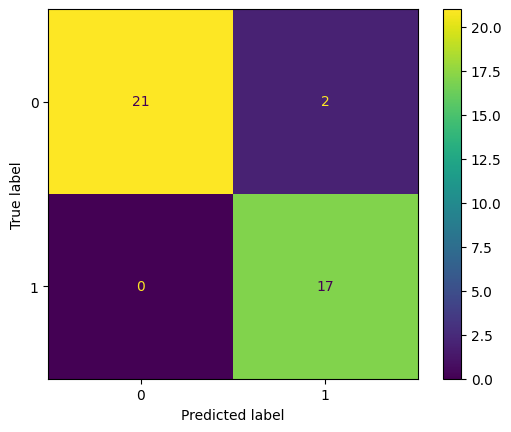

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.89      1.00      0.94        17

    accuracy                           0.95        40
   macro avg       0.95      0.96      0.95        40
weighted avg       0.96      0.95      0.95        40


# ====================


Métricas de avaliação de treino:

Métricas de avaliação de treino:
[[51  1]
 [ 0 40]]


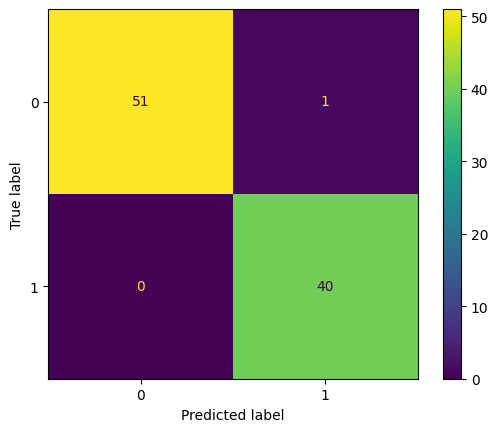

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.98      1.00      0.99        40

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



In [136]:
print("\nMétricas de avaliação de teste:")
y_pred_test = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

print("\nMétricas de avaliação de treino:")

print("\nMétricas de avaliação de treino:")
y_pred_train = grid.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# Conclusão

Entre os estimadores selecionados, observamos uma performance relativamente similar, mas o que performou melhor – sem overfittar tanto – foi a **árvore de decisões**, com 0.97 de acurácia no teste e 0.98 no treino.   
Porém, não é possível ter um grau de certeza muito bom de que o modelo terá uma boa performance em produção, por causa da quantidade de dados e porque não pudemos comprovar sua origem.  
Por isso, seria interessante coletar mais dados; quiçá, mais variáveis, para ter um modelo mais representativo.

## Bônus

## Modificando o target para Sleep Disorder

In [139]:
# Fazendo as modificações no dataframe:
df3 = df.copy(deep=True)
df3.drop_duplicates(inplace=True)
df3.reset_index(drop=True,inplace=True)
df3['Gender'] = df3['Gender'].map({'Male':0, 'Female': 1})
df3['BMI Category'] = df3['BMI Category'].map({'Normal Weight': 0, 'Normal':0, 'Obese': 2, 'Overweight': 1})
systolic = df3['Blood Pressure'].apply(lambda x: x.split('/')[0]).apply(lambda x: int(x))
diastolic = df3['Blood Pressure'].apply(lambda x: x.split('/')[1]).apply(lambda x: int(x))
map = []
for measure in range(len(systolic)):
  map.append(round((systolic[measure] + (2*diastolic[measure]))/3,1))
df3['MAP'] = map
df3 = pd.get_dummies(df3, columns=["BMI Category"], prefix="BMI Category", drop_first=True)
df3 = pd.get_dummies(df3, columns=["Occupation"], prefix="Occupation", drop_first=True)

<AxesSubplot: >

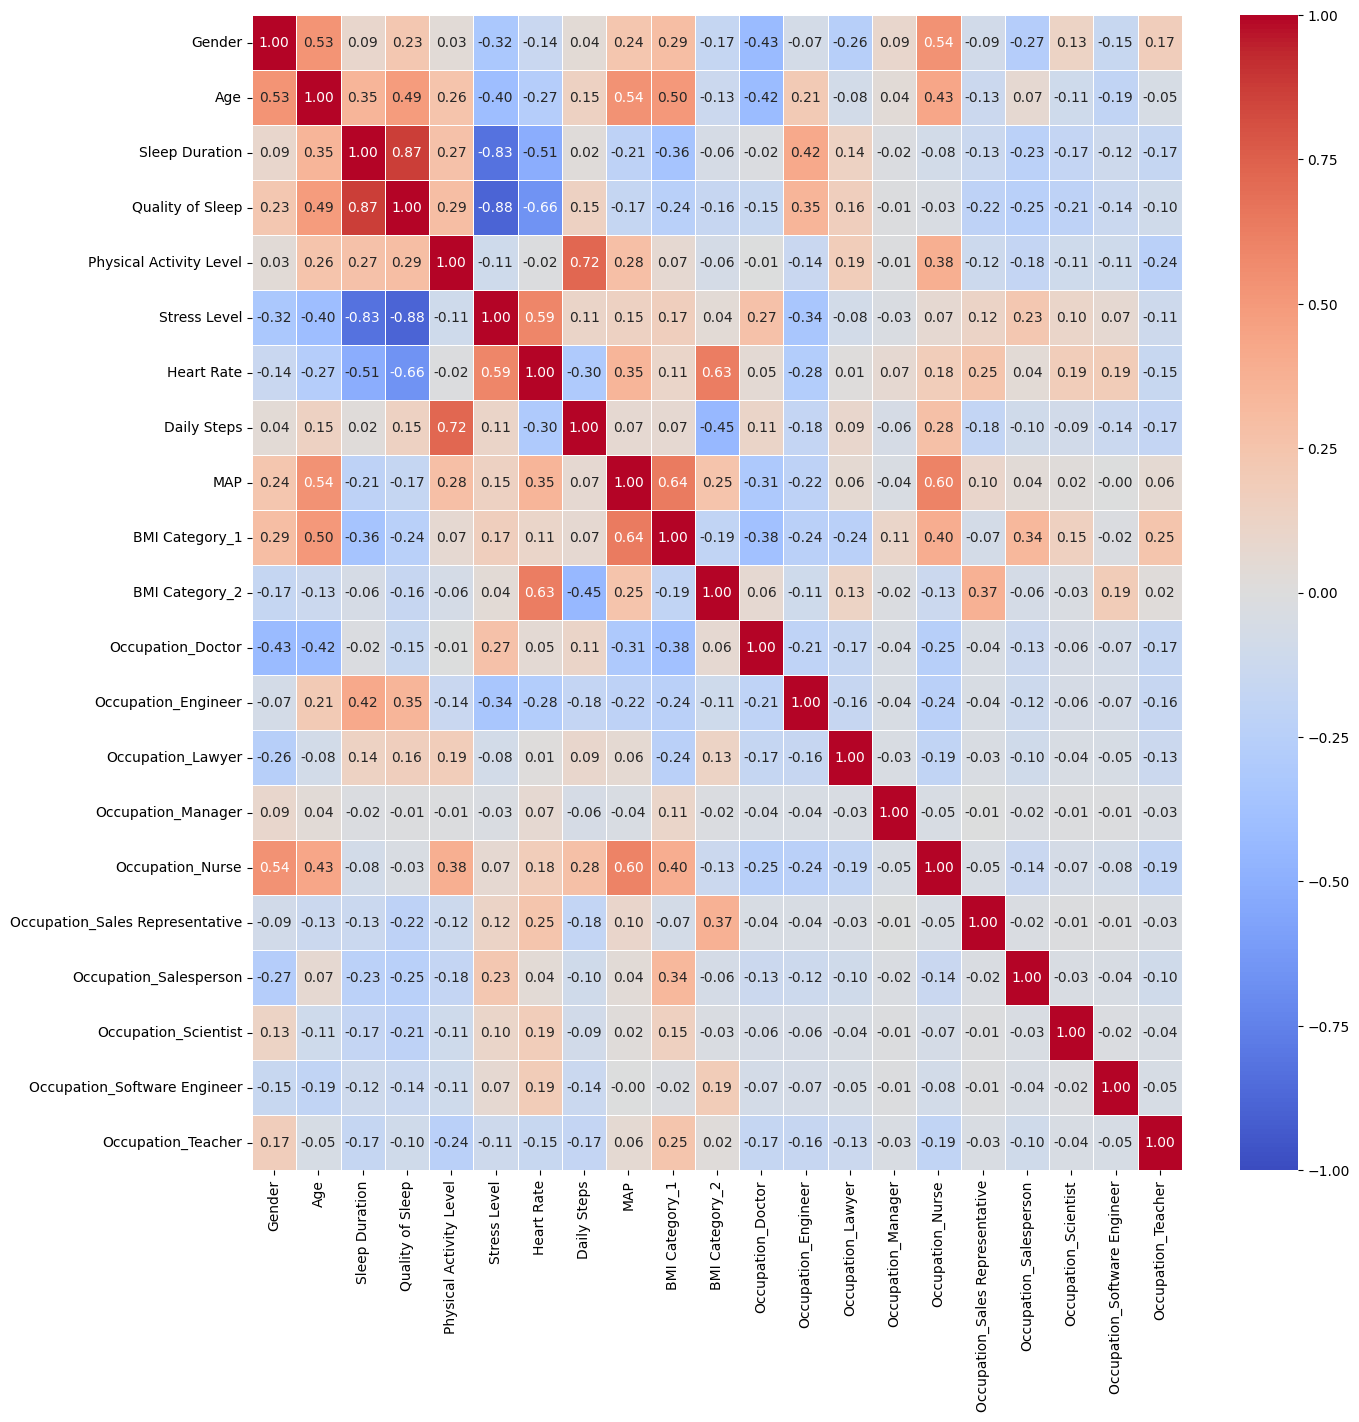

In [140]:
plt.figure(figsize=(15,15))
sns.heatmap(df3.corr(), vmax=1, vmin=-1, cmap='coolwarm', annot=True, linewidths=0.5, fmt='.2f')

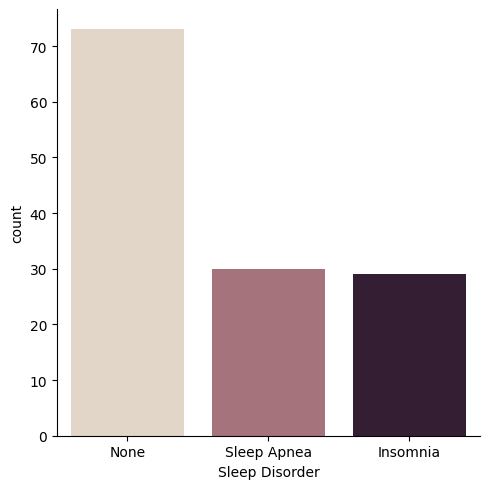

In [153]:
sns.catplot(df3, x="Sleep Disorder", kind="count", palette="ch:.25")

### Agora são dados desbalanceados

In [160]:
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imbpipeline

### Modelagem

In [148]:
df3.columns

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Blood Pressure',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'MAP', 'BMI Category_1',
       'BMI Category_2', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher'],
      dtype='object')

In [161]:
# Separando em Target e Features
y = df3["Sleep Disorder"]
X = df3.drop(columns=["Sleep Disorder", "Daily Steps", "Blood Pressure"])

In [162]:
# Separando dados para grupos de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)


Métricas de avaliação de teste:
[[ 5  3  1]
 [ 3 18  1]
 [ 2  4  3]]


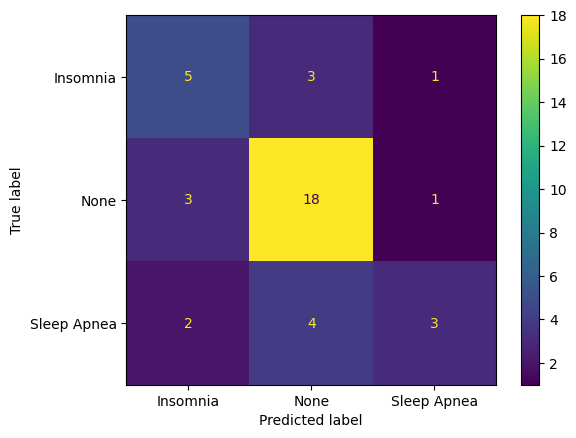

              precision    recall  f1-score   support

    Insomnia       0.50      0.56      0.53         9
        None       0.72      0.82      0.77        22
 Sleep Apnea       0.60      0.33      0.43         9

    accuracy                           0.65        40
   macro avg       0.61      0.57      0.57        40
weighted avg       0.64      0.65      0.64        40


# ====================


Métricas de avaliação de treino:
[[13  4  3]
 [ 5 41  5]
 [ 3  3 15]]


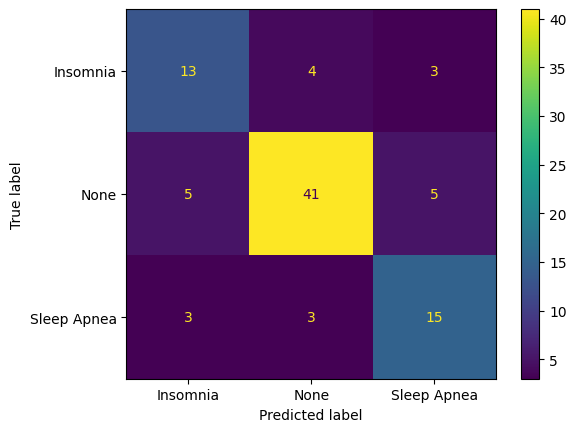

              precision    recall  f1-score   support

    Insomnia       0.62      0.65      0.63        20
        None       0.85      0.80      0.83        51
 Sleep Apnea       0.65      0.71      0.68        21

    accuracy                           0.75        92
   macro avg       0.71      0.72      0.71        92
weighted avg       0.76      0.75      0.75        92



In [167]:
# Criando pipeline
etapas = [("smote", SMOTEENN()),
          ("std_scaler", StandardScaler()),
          ("log_reg", LogisticRegression())]

pipe = imbpipeline(etapas)

# Criando KFold Estratificado para a cross-validation:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)
# Otimizando hiperparâmetros:
param_grid = {
    "log_reg__penalty" : ["", "l1", "l2", "elasticnet"],
    "log_reg__solver"  : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

# Utilizando GridSearch para otimizar os hiperparâmetros
grid = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

# Executando o GridSearch:
grid.fit(X_train, y_train)

print("\nMétricas de avaliação de teste:")
y_pred_test = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

print("\nMétricas de avaliação de treino:")

y_pred_train = grid.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


Métricas de avaliação de teste:
[[ 6  2  1]
 [ 3 18  1]
 [ 2  5  2]]


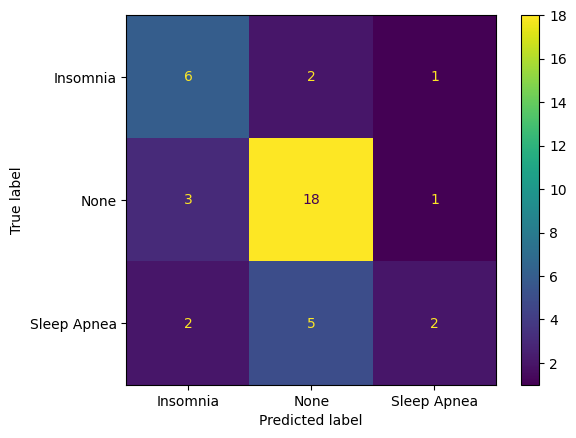

              precision    recall  f1-score   support

    Insomnia       0.55      0.67      0.60         9
        None       0.72      0.82      0.77        22
 Sleep Apnea       0.50      0.22      0.31         9

    accuracy                           0.65        40
   macro avg       0.59      0.57      0.56        40
weighted avg       0.63      0.65      0.63        40


# ====================


Métricas de avaliação de treino:
[[13  5  2]
 [ 7 39  5]
 [ 4  2 15]]


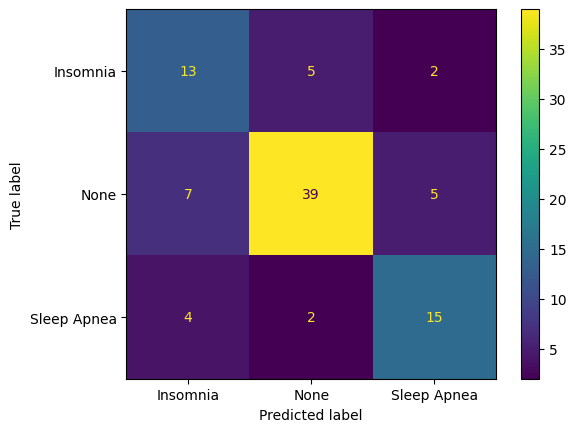

              precision    recall  f1-score   support

    Insomnia       0.54      0.65      0.59        20
        None       0.85      0.76      0.80        51
 Sleep Apnea       0.68      0.71      0.70        21

    accuracy                           0.73        92
   macro avg       0.69      0.71      0.70        92
weighted avg       0.74      0.73      0.73        92



In [168]:
# Criando pipeline
etapas = [("smote", SMOTEENN()),
          ("std_scaler", StandardScaler()),
          ("knn", KNeighborsClassifier())]

pipe = imbpipeline(etapas)

# Criando KFold Estratificado para a cross-validation:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

# Otimizando hiperparâmetros:
param_grid = {
    "knn__weights" : ["distance", "uniform"],
    "knn__metric" : ["manhattan", "euclidean", "minkowski"],
    "knn__n_neighbors" : range(3, 20)
}

# Utilizando GridSearch para otimizar os hiperparâmetros
grid = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

# Executando o GridSearch:
grid.fit(X_train, y_train)

print("\nMétricas de avaliação de teste:")
y_pred_test = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

print("\nMétricas de avaliação de treino:")

y_pred_train = grid.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


Métricas de avaliação de teste:
[[ 5  3  1]
 [ 9 12  1]
 [ 2  4  3]]


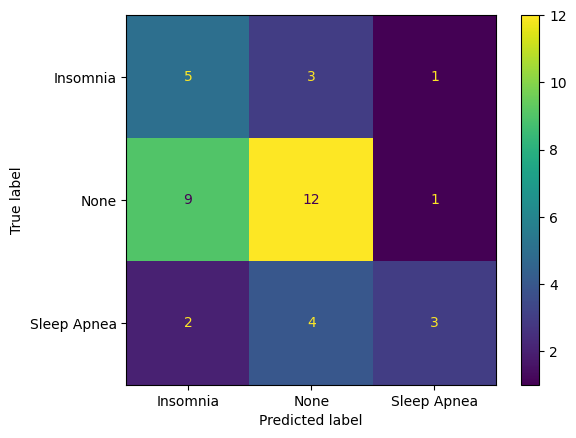

              precision    recall  f1-score   support

    Insomnia       0.31      0.56      0.40         9
        None       0.63      0.55      0.59        22
 Sleep Apnea       0.60      0.33      0.43         9

    accuracy                           0.50        40
   macro avg       0.51      0.48      0.47        40
weighted avg       0.55      0.50      0.51        40


# ====================


Métricas de avaliação de treino:
[[15  3  2]
 [ 9 38  4]
 [ 5  2 14]]


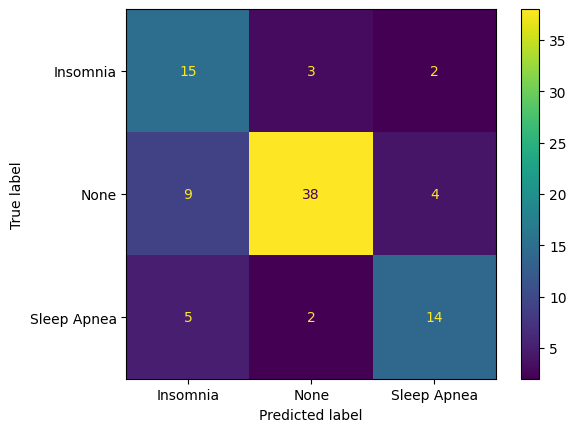

              precision    recall  f1-score   support

    Insomnia       0.52      0.75      0.61        20
        None       0.88      0.75      0.81        51
 Sleep Apnea       0.70      0.67      0.68        21

    accuracy                           0.73        92
   macro avg       0.70      0.72      0.70        92
weighted avg       0.76      0.73      0.74        92



In [169]:
# Criando pipeline
etapas = [("smote", SMOTEENN()),
          ("std_scaler", StandardScaler()),
          ("dt", DecisionTreeClassifier(random_state=42))]

pipe = imbpipeline(etapas)

# Criando KFold Estratificado para a cross-validation:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

# Otimizando hiperparâmetros:
param_grid = {
    "dt__criterion" : ["gini", "entropy"],
    "dt__splitter" : ["best", "random"],
    "dt__max_depth" : range(2, 11)
}

# Utilizando GridSearch para otimizar os hiperparâmetros
grid = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

# Executando o GridSearch:
grid.fit(X_train, y_train)

print("\nMétricas de avaliação de teste:")
y_pred_test = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

print("\nMétricas de avaliação de treino:")

y_pred_train = grid.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


Métricas de avaliação de teste:
[[ 6  2  1]
 [ 5 16  1]
 [ 2  3  4]]


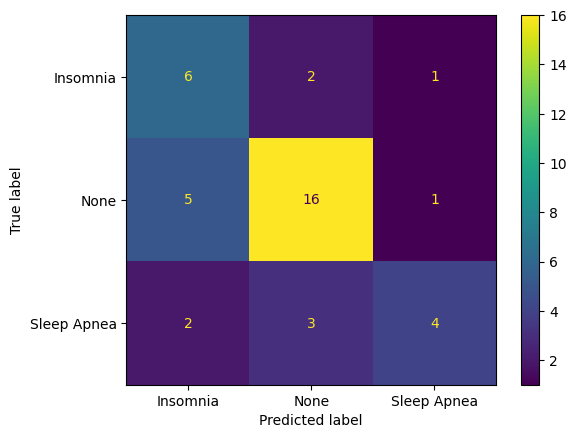

              precision    recall  f1-score   support

    Insomnia       0.46      0.67      0.55         9
        None       0.76      0.73      0.74        22
 Sleep Apnea       0.67      0.44      0.53         9

    accuracy                           0.65        40
   macro avg       0.63      0.61      0.61        40
weighted avg       0.67      0.65      0.65        40


# ====================


Métricas de avaliação de treino:
[[15  4  1]
 [ 6 41  4]
 [ 5  2 14]]


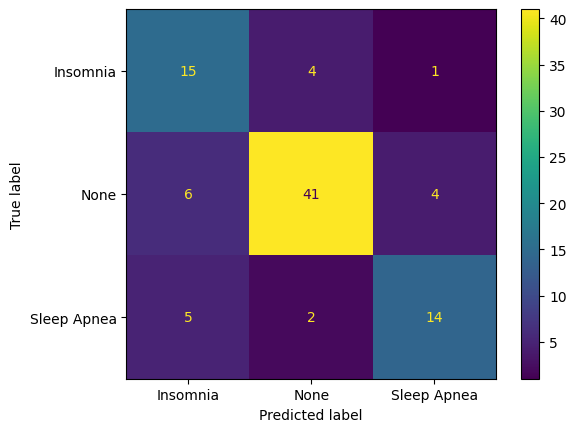

              precision    recall  f1-score   support

    Insomnia       0.58      0.75      0.65        20
        None       0.87      0.80      0.84        51
 Sleep Apnea       0.74      0.67      0.70        21

    accuracy                           0.76        92
   macro avg       0.73      0.74      0.73        92
weighted avg       0.78      0.76      0.77        92



In [170]:
# Criando pipeline
etapas = [("smote", SMOTEENN()),
          ("std_scaler", StandardScaler()),
          ("rf", RandomForestClassifier(random_state=42))]

pipe = imbpipeline(etapas)

# Criando KFold Estratificado para a cross-validation:
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

# Otimizando hiperparâmetros:
param_grid = {
    "rf__n_estimators" : range(100, 600, 100),
    "rf__max_depth" : range(3, 6),
    "rf__max_features" : ['sqrt', 'log2'],
    "rf__criterion" : ['entropy', 'gini']
}

# Utilizando GridSearch para otimizar os hiperparâmetros
grid = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=grupo,
                        n_jobs=-1)

# Executando o GridSearch:
grid.fit(X_train, y_train)

print("\nMétricas de avaliação de teste:")
y_pred_test = grid.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

print("\nMétricas de avaliação de treino:")

y_pred_train = grid.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))